In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Read CSV file into DataFrame
df = pd.read_csv('../all_results.csv')

# Filter DataFrame to show only rows where 'accuracy' > 0.6 and 'duration' < 30
df_filtered = df.loc[(df['accuracy'] > 0.6) & (df['duration'] < 30)]

# Sort filtered DataFrame by 'accuracy' column in descending order
df_sorted = df_filtered.sort_values('accuracy', ascending=False)

# Display top 50 rows of sorted DataFrame
df_sorted.head(50)



,model,duration,best_features,accuracy
388,SelectKBest_CatBoost,30,"['time', 'high', 'volume', 'turnover', 'S2', 'S3', 'BBU_5_2.0', 'BBB_5_2.0', 'BBP_5_2.0', 'ATR']",0.678750
22,XGBoost_CatBoost,3,"['time', 'turnover', 'S3', 'BBL_5_2.0', 'BBB_5_2.0', 'BBP_5_2.0', 'EMA_5', 'STOCHk_14_3_3', 'ATR', 'CCI']",0.677712
28,LightGBM_CatBoost,3,"['time', 'volume', 'turnover', 'avg_vol_last_100', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ATR', 'ROC', 'CCI']",0.676346
27,LightGBM_LightGBM,3,"['time', 'volume', 'turnover', 'avg_vol_last_100', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ATR', 'ROC', 'CCI']",0.674113
21,XGBoost_LightGBM,3,"['time', 'turnover', 'S3', 'BBL_5_2.0', 'BBB_5_2.0', 'BBP_5_2.0', 'EMA_5', 'STOCHk_14_3_3', 'ATR', 'CCI']",0.673740
34,CatBoost_CatBoost,3,"['volume', 'turnover', 'avg_vol_last_100', 'MACDh_12_26_9', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ATR', 'ROC', 'CCI']",0.672499
328,CatBoost_CatBoost,24,"['volume', 'turnover', 'avg_vol_last_100', 'MACDh_12_26_9', 'MACDs_12_26_9', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ATR', 'ROC', 'CCI']",0.670659
4,RFE_CatBoost,3,"['time', 'turnover', 'avg_vol_last_100', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ATR', 'CCI']",0.670638
33,CatBoost_LightGBM,3,"['volume', 'turnover', 'avg_vol_last_100', 'MACDh_12_26_9', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ATR', 'ROC', 'CCI']",0.670266
3,RFE_LightGBM,3,"['time', 'turnover', 'avg_vol_last_100', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ATR', 'CCI']",0.670266


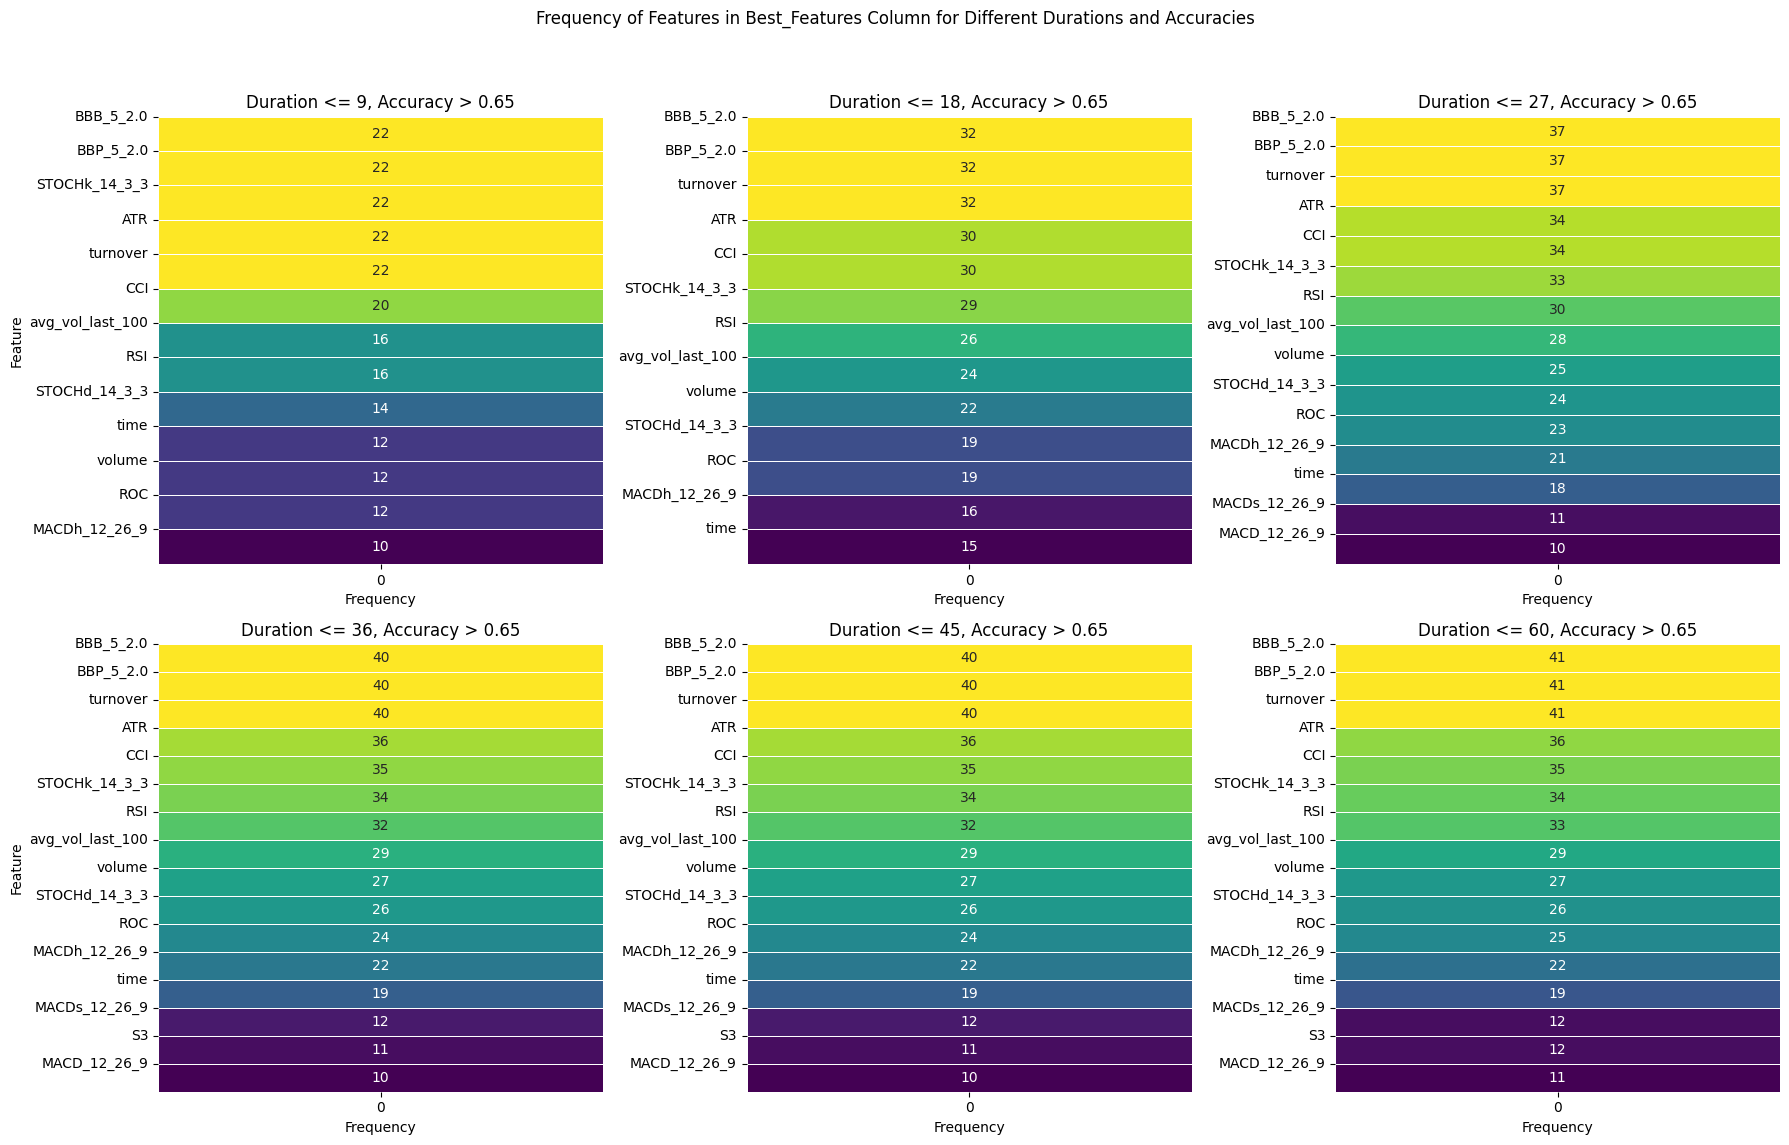

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

durations = [9, 18, 27, 36, 45, 60]
accuracy_threshold = 0.65

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Frequency of Features in Best_Features Column for Different Durations and Accuracies')

for index, duration in enumerate(durations):
    row = index // 3
    col = index % 3
    
    # Filter DataFrame based on the duration and accuracy threshold
    df_filtered = df.loc[(df['accuracy'] > accuracy_threshold) & (df['duration'] <= duration)]

    # Extract feature lists from the 'best_features' column and create a single list of all features
    all_features = []
    for feature_list_str in df_filtered['best_features']:
        feature_list = eval(feature_list_str)  # Convert the string representation of a list to an actual list
        all_features.extend(feature_list)

    # Count the occurrences of each feature
    feature_counts = pd.Series(all_features).value_counts()

    # Filter feature counts to only show features with a count of 10 or more
    feature_counts_filtered = feature_counts[feature_counts >= 10]

    # Create a heatmap with the filtered feature counts
    sns.heatmap(feature_counts_filtered.to_frame(), cmap='viridis', annot=True, fmt='d', linewidths=0.5, ax=axes[row][col], cbar=False)
    axes[row][col].set_title(f'Duration <= {duration}, Accuracy > {accuracy_threshold}')
    axes[row][col].set_xlabel('Frequency')
    axes[row][col].set_yticks(range(len(feature_counts_filtered)))
    axes[row][col].set_yticklabels(feature_counts_filtered.index, rotation=0)

axes[0][0].set_ylabel('Feature')
axes[1][0].set_ylabel('Feature')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for better spacing
plt.show()


In [57]:
unique_features = set()

for duration in durations:
    # Filter DataFrame based on the duration and accuracy threshold
    df_filtered = df.loc[(df['accuracy'] > accuracy_threshold) & (df['duration'] <= duration)]

    # Extract feature lists from the 'best_features' column and create a single list of all features
    all_features = []
    for feature_list_str in df_filtered['best_features']:
        feature_list = eval(feature_list_str)  # Convert the string representation of a list to an actual list
        all_features.extend(feature_list)

    # Count the occurrences of each feature
    feature_counts = pd.Series(all_features).value_counts()

    # Filter feature counts to only show features with a count of 10 or more
    feature_counts_filtered = feature_counts[feature_counts >= 10]

    # Add the unique features from the filtered feature counts to the unique_features set
    unique_features.update(feature_counts_filtered.index)

# Convert the set to a list
unique_features_list = list(unique_features)

print(unique_features_list)


['turnover', 'MACDh_12_26_9', 'CCI', 'MACDs_12_26_9', 'MACD_12_26_9', 'BBB_5_2.0', 'S3', 'volume', 'STOCHk_14_3_3', 'time', 'ROC', 'BBP_5_2.0', 'ATR', 'avg_vol_last_100', 'STOCHd_14_3_3', 'RSI']
